## FA19-BCS-034
## Abdul Rehman
## G-2

In [2]:
#load important libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import re
import numpy as np

In [3]:
# reading data set 
path = "./the-hello-dataset-fa22.csv"
df = pd.read_csv(path)
df 

,Name,Gender,HSSC-1,HSSC-2,CGPA,FavoriteColor,BirthMonth,Weight
0,Muhammad Usman,Male,440,369,2.80,Black,March,77.0
1,Taha Ishfaq,Male,415,408,2.73,Red,March,72.0
2,Muhammad Hamdan,Male,388,321,2.78,Black,October,53.0
3,Syeda Maham Gillani,Female,412,440,3.11,Blue,February,63.0
4,Umar Wasim,Male,364,469,2.42,black,October,80.0
...,...,...,...,...,...,...,...,...
129,M Abubakar Malik,Male,410,349,2.94,Blue,Feburary,65.0
130,Muhammad Ali,Male,403,390,2.52,Yellow,October,81.0
131,shafaqat ali,Male,424,824,3.07,Black,May,58.0
132,Ammar Asif,Male,351,423,2.52,Black,December,68.0


# Normalization

In [42]:
# Capitalising first letter of each value in name column 
# removing or truncating spaces from the beginning and the end of the original string.
df['Name'] = df['Name'].str.title()
df['Name'] = df['Name'].str.strip()
df

,Name,Gender,HSSC-1,HSSC-2,CGPA,FavoriteColor,BirthMonth,Weight
0,Muhammad Usman,Male,440,369,2.80,Black,March,77.0
1,Taha Ishfaq,Male,415,408,2.73,Red,March,72.0
2,Muhammad Hamdan,Male,388,321,2.78,Black,October,53.0
3,Syeda Maham Gillani,Female,412,440,3.11,Blue,February,63.0
4,Umar Wasim,Male,364,469,2.42,black,October,80.0
...,...,...,...,...,...,...,...,...
129,M Abubakar Malik,Male,410,349,2.94,Blue,Feburary,65.0
130,Muhammad Ali,Male,403,390,2.52,Yellow,October,81.0
131,Shafaqat Ali,Male,424,824,3.07,Black,May,58.0
132,Ammar Asif,Male,351,423,2.52,Black,December,68.0


### Cleaning Marks

In [43]:
df.loc[df['HSSC-1'] >= 550, 'HSSC-1'] = df['HSSC-1']/2
df.loc[df['HSSC-2'] >= 550, 'HSSC-2'] = df['HSSC-2']/2

    

## Cleaning Favorite Column

In [44]:
# Capitalising first letter of each value in FavoriteColor column 
# removing or truncating spaces from the beginning and the end of the original string.
df['FavoriteColor'] = df['FavoriteColor'].str.strip()
df['FavoriteColor'] = df['FavoriteColor'].str.title()
df['FavoriteColor'].value_counts()

Black             46
Blue              24
Yellow            11
Red               10
Green              8
White              5
Pink               4
Navy Blue          4
Light Green        4
Orange             4
Peach              3
Purple             3
Dark Blue          3
Gray And Brown     2
Mustard            1
Brown              1
Grey               1
Name: FavoriteColor, dtype: int64

## Cleaning BirthMonth Column

In [45]:
# Capitalising first letter of each value in BirthMonth column 
# removing or truncating spaces from the beginning and the end of the original string.
# Replacing a wrong month name with correct one
df['BirthMonth'] = df['BirthMonth'].str.strip()
df['BirthMonth'] = df['BirthMonth'].str.title()
df['BirthMonth'] = df['BirthMonth'].str.replace('Feburary','February')


### Print the list of all students whose first name starts with letter the 'H'.

In [46]:
for name in df['Name']:
    result = re.match("^H",name)
    if result != None:
        print(name)

Hamza Naveed
Habib Ullah
Hunain Javed
Hafiz Malahim Labib.
Hamna Tariq Saleemi
Hina
Hamza Javed Khan
Husnain Ahmed
Hamayoun Masroor
Hussain Afzal


### Print the total number of students who have a three words name (first-middle-surname).

In [47]:
ThreeWordCounter =0
for name in df['Name']: 
    result = re.match(r"^[a-zA-Z]+ [A-Za-z]+ [A-Za-z]+$",name.strip())
    if result:
        ThreeWordCounter += 1;
        print(name)
print("Total Student having three word name:",ThreeWordCounter)

Syeda Maham Gillani
Shahzada Mujahid Raza
Muhammad Subhan Khan
Sarmad Waheed Ahmed
M Hassaan Lateef
Ahmed Amjad Dar
Muhammad Ibrahim Khalil
Muhammad Saim Jamil
Ahmar Hafeez Khan
Muhammad Umar Asghar
Muhammad Haider Awan
Muhammad Ammar Khalid
Osama Nadeem Khan
Muhammad Hashir Azeem
Muhammad Aun Raza
Hamna Tariq Saleemi
Bashara Tehseen Liaqat
Muhammad Hammad Ejaz
Muhammad Saif Ullah
Muhammad Al Fahad
Abdul Hadi Khan
Hamza Javed Khan
Ghulam Mustafa Shiekh
Muhammad Azeem Shoukat
Muhammad Nouman Tahir
Muhammad Huzaifa Jawad
Noor Tariq Rana
Muhammad Asadullah Rind
Muhammad Talha Saeed
Muhammad Bilal Aslam
Syed Ali Mehdi
Aftab Ahmad Khan
Syed Zain Raza
Muhammad Umair Tariq
M Abubakar Malik
Total Student having three word name: 35


### Print the percentage of students who have a CGPA of 3.0 or above

In [48]:
RequiredCounter =0
Total =0
for cgpa in df['CGPA']:
    if cgpa >= 3.00:
        RequiredCounter += 1
for students in df['Name']:
    Total +=1

Percent = RequiredCounter/Total *100
print("The percentage of student having cgpa > 3.0: ")
print('%.2f'% Percent +'%')


The percentage of student having cgpa > 3.0: 
28.36%


### Plot a pie chart to show the ratio of male and female students.

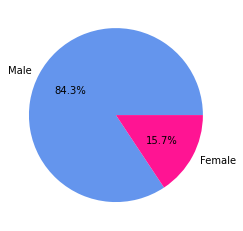

In [49]:
NumberOfFemale=0
NumberOfMale =0
for gender in df['Gender']:
    if gender == 'Female':
        NumberOfFemale +=1
    else:
        NumberOfMale +=1
#pie chart 
gender = ['Male', 'Female']
data = [NumberOfMale,NumberOfFemale]
colors = ( "cornflowerblue", "deeppink")
plt.pie(data, labels = gender, autopct='%1.1f%%', colors = colors)
plt.show()

###  Plot the CGPA of all male students on a histogram with intervals 2.0-2.5, 2.6-3.0, 3.1-3.5, 3.6-4.0.

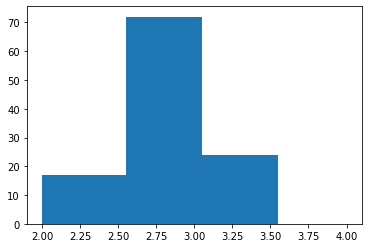

In [53]:
#histogram
#The given intervals are in inclusive form. I make them exclusive(1.95,2.55,3.05,3.55,4.05) but we start with 2 and end at 4.
MaleStudentRecord = df.loc[df["Gender"]=="Male"]

plt.hist(x = MaleStudentRecord.CGPA,bins=[2,2.55,3.05,3.55,4])
plt.show()

###  Plot the HSSC-1 marks of all male vs female students on a scatter plot

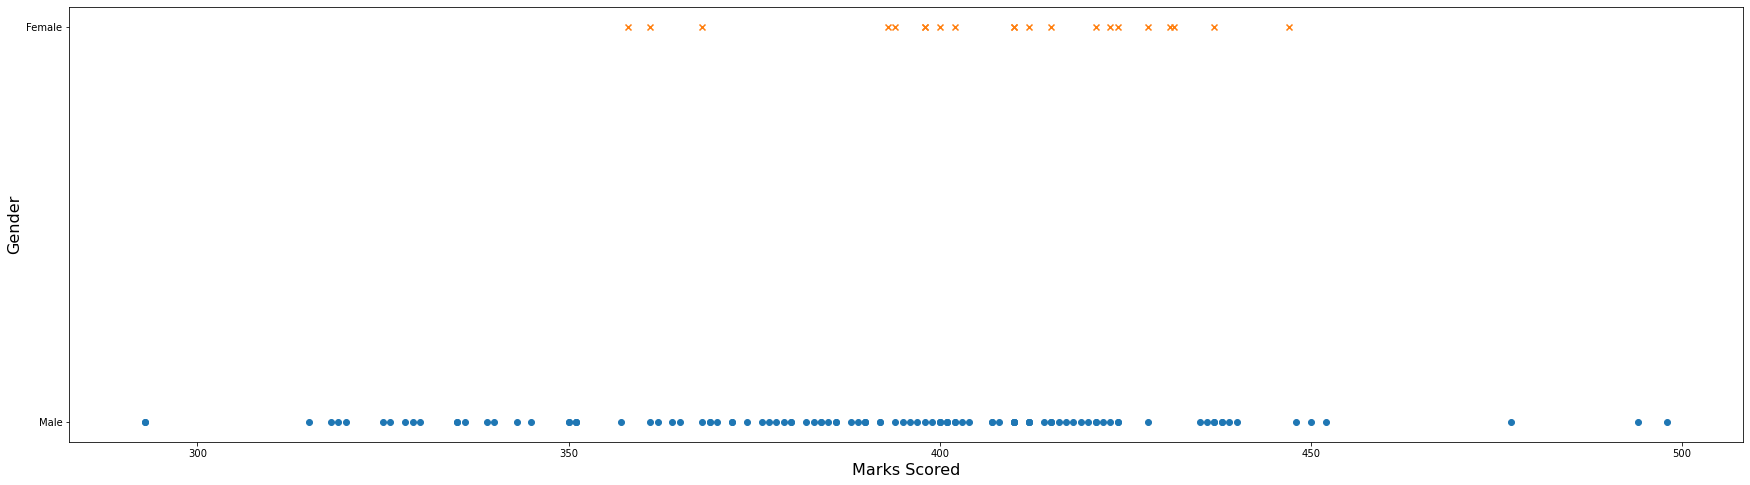

In [54]:
# on x-axis, there is marks obtained by students.
# on y-axis, gender of students who got the marks.
Males = df.loc[df["Gender"]=="Male"]
Females = df.loc[df["Gender"]=="Female"]
Males_grades = list(Males['HSSC-1'])
Females_grades = list(Females['HSSC-1'])


range_males = list(Males.Gender)
range_females = list(Females.Gender)

plt.figure(figsize = (30,8))
plt.scatter(Males_grades, range_males, marker='o')
plt.scatter(Females_grades, range_females, marker='x')

plt.xlabel('Marks Scored', fontsize=16)
plt.ylabel('Gender', fontsize=16)
plt.show()

### Plot the favorite colors of male vs female students on a bar chart.

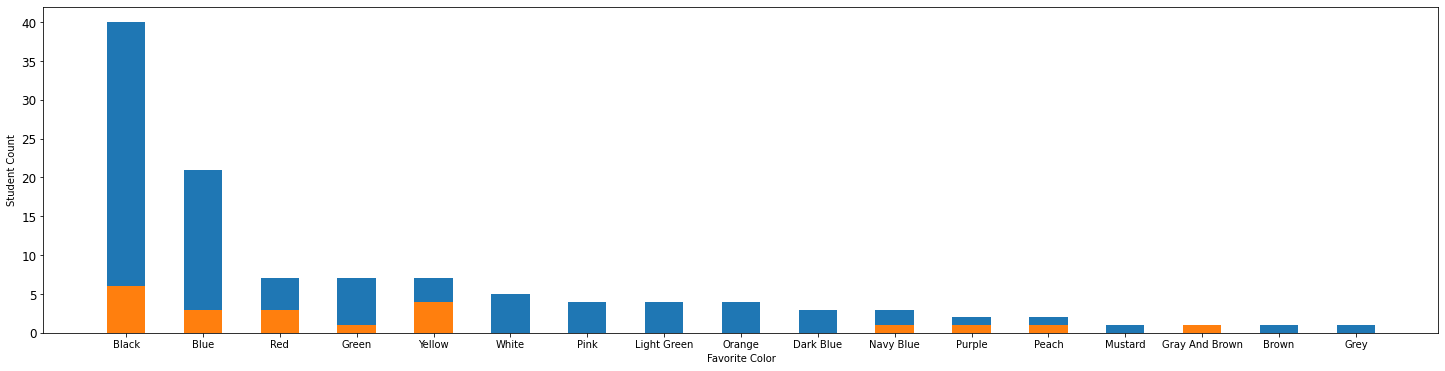

In [55]:
Males = df.loc[df["Gender"]=="Male"]
Females = df.loc[df["Gender"]=="Female"]


MaleColorsList=list(Males.FavoriteColor.value_counts().index) #saving unique colors present in male student FavoriteColor Column 
MaleCounterColor = list(Males.FavoriteColor.value_counts().values) #count how much person have same favorite color in male student FavoriteColor Column 

FemaleColorsList=list(Females.FavoriteColor.value_counts().index) #saving unique colors present in female student FavoriteColor Column 
FemaleCounterColor = list(Females.FavoriteColor.value_counts().values) #count how much person have same favorite color in male student FavoriteColor Column 




plt.figure(figsize = (25,6))
width = 0.5
plt.bar(MaleColorsList, MaleCounterColor,width)
plt.bar(FemaleColorsList, FemaleCounterColor,width)
plt.xlabel("Favorite Color")
plt.ylabel("Student Count")


plt.yticks(fontsize = 12)

plt.show()

### Plot line chart of students and their birth months.

In [56]:
#x-axis show the count of students born in same month
#y-axis show the birth months
df['BirthMonth'].value_counts()
Months = list(df['BirthMonth'].value_counts().index)
StudentCountInMonth = list(df['BirthMonth'].value_counts().values)


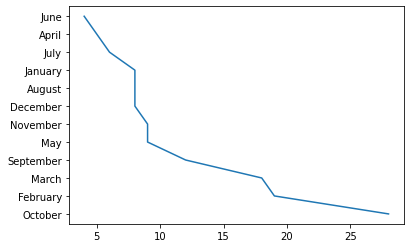

In [57]:
plt.plot(StudentCountInMonth,Months)
plt.show()

### Create a correlation matrix between HSSC-1 and HSSC-2 marks and then plot on a heatmap.

<AxesSubplot:>

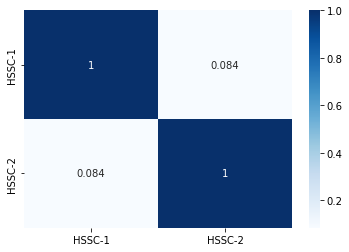

In [58]:

DATA = {
    'HSSC-1': list(df['HSSC-1']),
    'HSSC-2': list(df['HSSC-2'])
    
}

hj = pd.DataFrame(DATA)

corr_matrix = hj.corr()
sns.heatmap(corr_matrix, cmap="Blues", annot=True)